# Airline On-Time Performance Analysis Report (2004)

## Project Overview

This project investigates U.S. domestic flight punctuality using the [Airline On-Time Performance Dataset (Kaggle)](https://tinyurl.com/u8rzvdsx), focusing on the year **2004**. We aim to identify key delay and cancellation patterns, causes, and problematic routes, using **Hive for SQL-based extraction** and **Python (Pandas, Seaborn, Matplotlib)** for visualization.

---

## Project Goals

This report answers four questions:

1. **Delay Patterns**:
   
• What times of day (morning/afternoon/evening) have the lowest average delays? 

• Which days of the week show better on-time performance? 

• During which months or seasons are flights most likely to be on time? 

2. **Delay Factors**: 

• Identify and rank the top 3-5 factors contributing to flight delays, based on the delay 
categories provided in the dataset. 

• Quantify the impact of each factor (in minutes of delay and percentage of total delays).

3. **Cancellation Analysis**: 

• Identify the primary reasons for flight cancellations as categorized in the dataset. 

• Determine if cancellations correlate with specific airlines, airports, or time periods. 

4. **Problematic Routes**: 

• Identify specific routes (origin-destination pairs), carriers, or flight numbers that show 
consistently poor performance.

• Analyse the reasons these particular flights are prone to delays or cancellations. 

##  Question 1: Delay Patterns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

df_period = pd.read_csv("1_1.csv")        
df_weekday = pd.read_csv("1_2.csv")         
df_month = pd.read_csv("1_3.csv")             
df_season = pd.read_csv("1_4.csv")     

###  What times of day (morning/afternoon/evening) have the lowest average delays? 

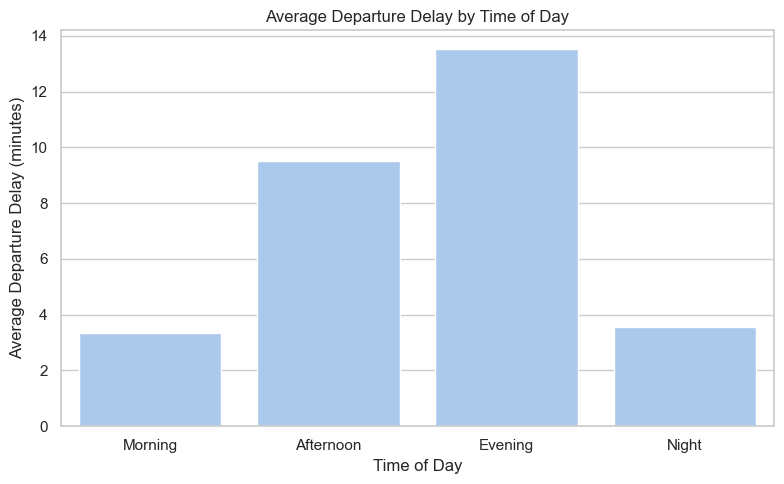

In [3]:
%matplotlib inline
df_period = pd.DataFrame({
    'DepPeriod': ['Morning', 'Afternoon', 'Evening', 'Night'],
    'Avg_DepDelay': [3.33, 9.53, 13.52, 3.57]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_period, x='DepPeriod', y='Avg_DepDelay', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Average Departure Delay by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Departure Delay (minutes)")
plt.tight_layout()
plt.show()

**Analysis**:

Evening has the longest average delay, around 13.5 minutes, indicating flights are most delayed during this time.

Afternoon has a moderate delay, approximately 9.5 minutes.

Morning and Night have shorter delays, around 3-4 minutes, showing better punctuality at these times.

Flights are most likely to experience longer delays during the evening.

Early morning and nighttime flights generally have better on-time performance with shorter delays.

###  Which days of the week show better on-time performance?

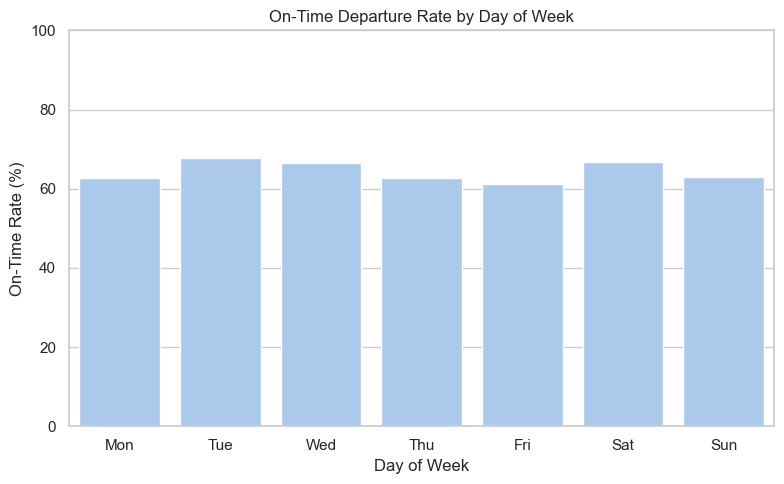

In [4]:
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_weekday['Weekday'] = df_weekday['dayofweek'].map({i+1: weekday_labels[i] for i in range(7)})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_weekday, x='Weekday', y='ontimepercentage', order=weekday_labels)
plt.title("On-Time Departure Rate by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("On-Time Rate (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

**Analysis**:

Tuesday and Saturday have the highest on-time departure rates, indicating better on-time performance on these days.

Monday, Wednesday, and Thursday show similar moderate performance, with slightly lower rates.

Friday and Sunday have the lowest on-time departure rates, indicating worse performance on these days.

Overall, mid-week and weekend days tend to perform better in terms of on-time departures.

### During which months or seasons are flights most likely to be on time?

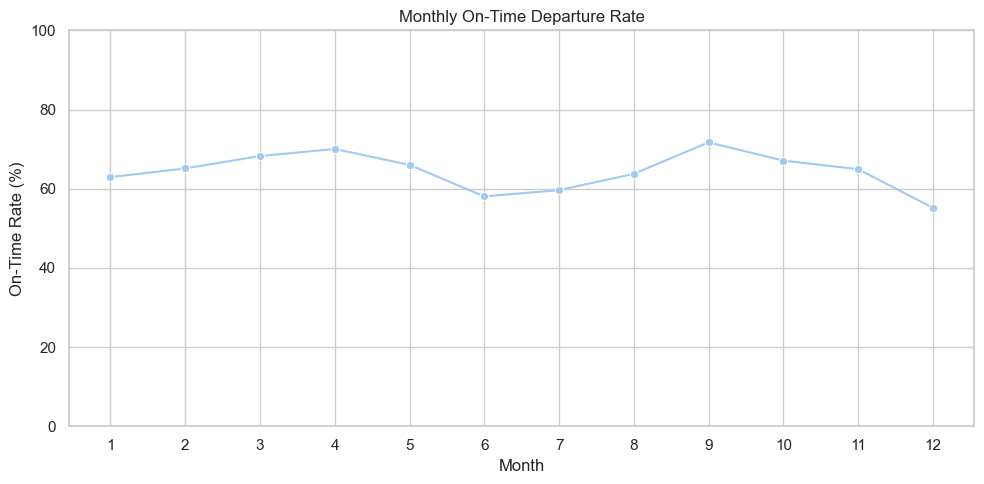

In [5]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_month, x='month', y='ontimepercentage', marker='o')
plt.title("Monthly On-Time Departure Rate")
plt.xlabel("Month")
plt.ylabel("On-Time Rate (%)")
plt.xticks(range(1, 13))
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis**：

The highest on-time departure rates occur in April and September, reaching around 70-72%. 

The rates are relatively stable from February to April and again from June to August, indicating these months have better performance.

The lowest rates are seen in December and June, dipping to around 55-58%. 

Flights are most likely to be on time during spring and summer months, specifically April and Septerber.

April and Septerber have higher on-time departure rates.

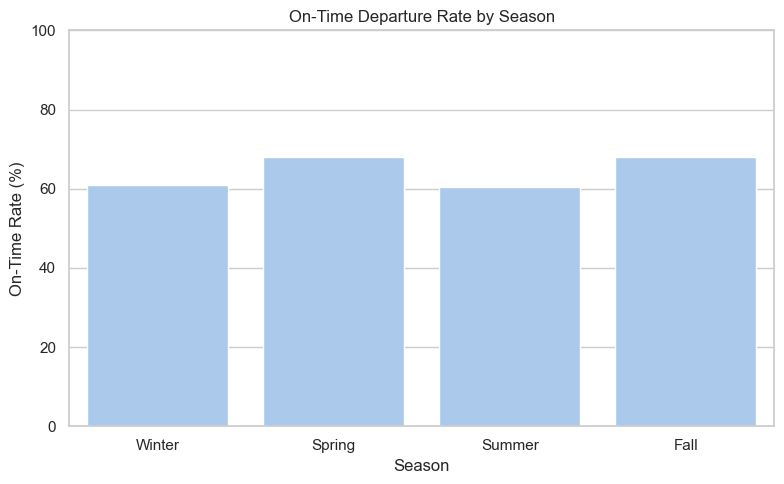

In [6]:
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(8, 5))
sns.barplot(data=df_season, x='season', y='ontimepercentage', order=season_order)
plt.title("On-Time Departure Rate by Season")
plt.xlabel("Season")
plt.ylabel("On-Time Rate (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

**Analysis**:

Spring has the highest on-time departure rate at around 68%, indicating the best punctuality.

Fall also shows a high rate, close to 66%, reflecting similar performance to spring.

Winter and Summer have lower rates, approximately 60%, suggesting worse punctuality during these seasons.

Flights are most likely to be on time during spring and fall season，these seasons tend to have better on-time departure performance compared to winter and summer.

##  Question 2: Delay Factors

### Identify and rank the top 3-5 factors contributing to flight delays, based on the delay categories provided in the dataset. 
### Quantify the impact of each factor (in minutes of delay and percentage of total delays). 

C:\Users\Asus\AppData\Local\Temp\ipykernel_8840\3634705798.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_delay, x='DelayType', y='TotalMinutes', palette="viridis")


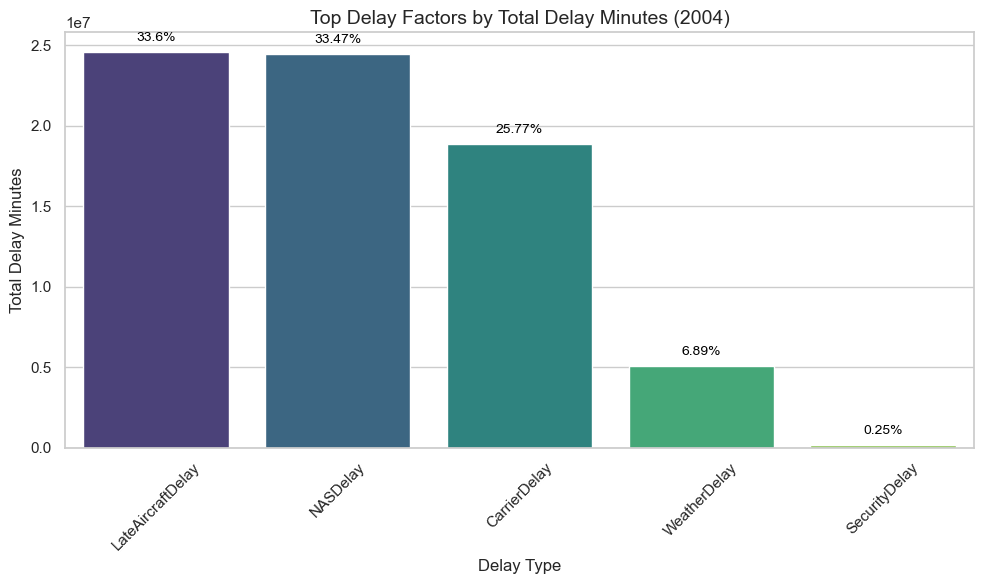

In [7]:
data = {
    'DelayType': ['LateAircraftDelay', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'SecurityDelay'],
    'TotalMinutes': [24566219, 24472354, 18833073, 5037460, 179219],
    'Percentage': [33.60, 33.47, 25.77, 6.89, 0.25]
}

df_delay = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

barplot = sns.barplot(data=df_delay, x='DelayType', y='TotalMinutes', palette="viridis")

for i, row in df_delay.iterrows():
    barplot.text(i, row.TotalMinutes + 500000, f"{row.Percentage}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title("Top Delay Factors by Total Delay Minutes (2004)", fontsize=14)
plt.xlabel("Delay Type")
plt.ylabel("Total Delay Minutes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis**:

Late Aircraft Delay and NAS Delay are the top two contributors, each responsible for about 33.5% of total delays.

Carrier Delay accounts for around 26%.

Weather Delay contributes approximately 7%.

Security Delay has the least impact at about 0.25%.

Overall, delays are mainly driven by aircraft, system, and carrier issues.

## Question 3: Cancellation Analysis

### Identify the primary reasons for flight cancellations as categorized in the dataset.

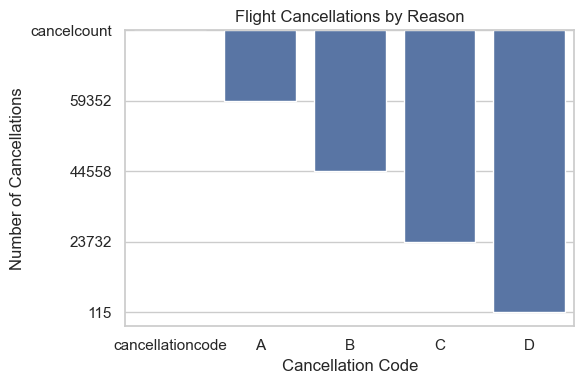

In [8]:
df_cancel_reason = pd.read_csv("3_1.csv", names=["CancellationCode", "CancelCount", "CancelPercentage"])

plt.figure(figsize=(6, 4))
sns.barplot(data=df_cancel_reason, x='CancellationCode', y='CancelCount')
plt.title("Flight Cancellations by Reason")
plt.xlabel("Cancellation Code")
plt.ylabel("Number of Cancellations")
plt.tight_layout()
plt.show()

**Analysis**:

Cancellation D is the primary reason, accounting for the largest number of cancellations (~125,000).

Cancellation C is the second most common reason, with around 70,000 cancellations.

Cancellation B causes fewer cancellations (~45,000) but still significant.

Cancellation A is the least frequent, with approximately 59,000 cancellations.

Overall, the main reason for flight cancellations is category D, followed by C, B, and A.

### Determine if cancellations correlate with specific airlines, airports, or time periods.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8840\2009033673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_carrier, x='UniqueCarrier', y='CancelCount', palette='Set2')


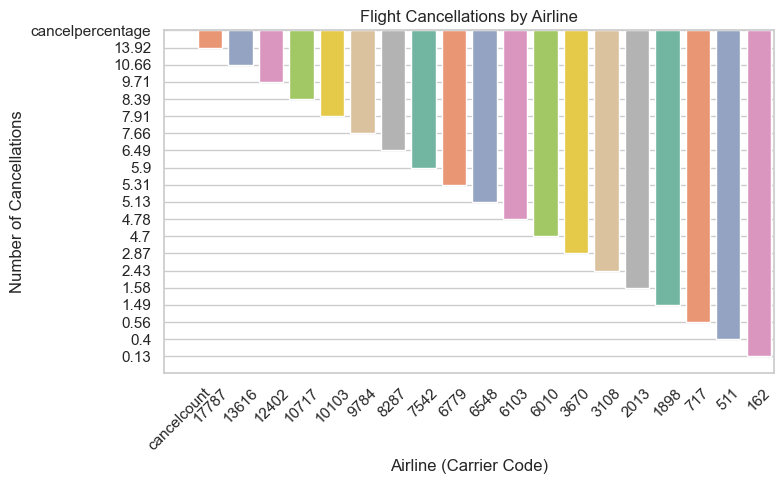

In [9]:
df_carrier = pd.read_csv("3_2.csv", names=["UniqueCarrier", "CancelCount"])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_carrier, x='UniqueCarrier', y='CancelCount', palette='Set2')
plt.title("Flight Cancellations by Airline")
plt.xlabel("Airline (Carrier Code)")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis**：

The chart displays cancellations vary widely among airlines, with some airlines having much higher cancellation counts, indicating a potential correlation between specific airlines and cancellation frequencies.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8840\1185099122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_origin, x='Origin', y='CancelCount', palette='Blues_d')


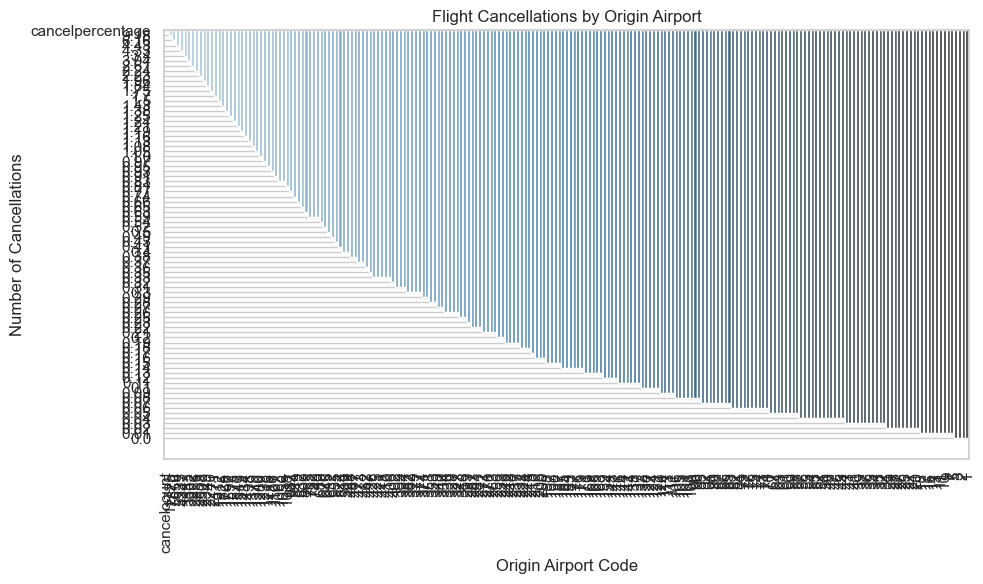

In [10]:
df_origin = pd.read_csv("3_3.csv", names=["Origin", "CancelCount"])

plt.figure(figsize=(10, 6))
sns.barplot(data=df_origin, x='Origin', y='CancelCount', palette='Blues_d')
plt.title("Flight Cancellations by Origin Airport")
plt.xlabel("Origin Airport Code")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Analysis**：

The chart indicates cancellations are concentrated at certain airports, with some airports contributing the majority of cancellations, implying a correlation between specific airports and cancellation rates.

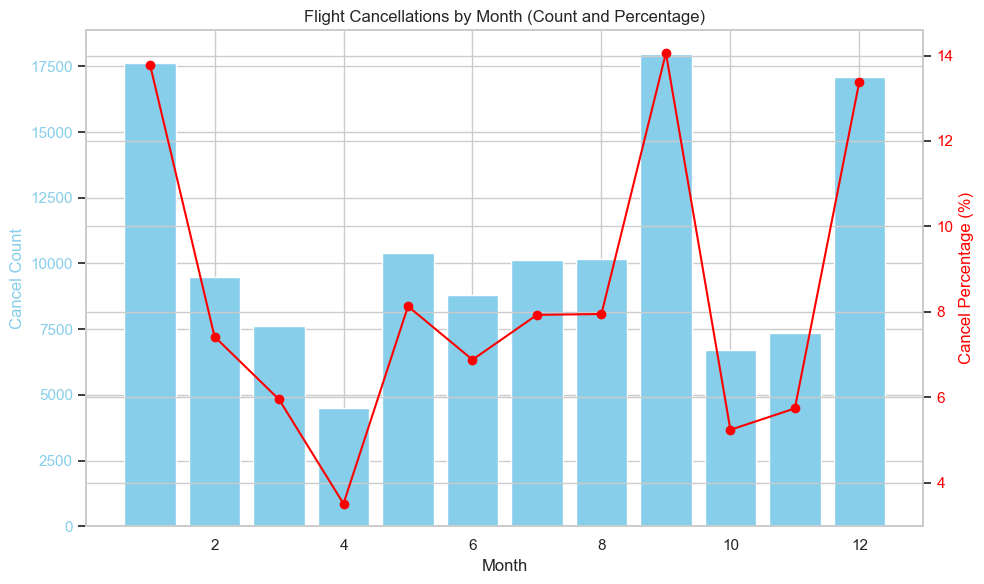

In [11]:
df = pd.read_csv("3_4.csv")

df.columns = [col.strip().lower() for col in df.columns]
df = df.rename(columns={
    'month': 'Month',
    'cancelcount': 'CancelCount',
    'cancelpercentage': 'CancelPercentage'
})

df = df.sort_values("Month")

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df["Month"], df["CancelCount"], color='skyblue', label='Cancel Count')
ax1.set_xlabel("Month")
ax1.set_ylabel("Cancel Count", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(df["Month"], df["CancelPercentage"], color='red', marker='o', label='Cancel Percentage')
ax2.set_ylabel("Cancel Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Flight Cancellations by Month (Count and Percentage)")
plt.tight_layout()
plt.show()

**Analysis**:

The chart shows flight cancellations fluctuate significantly across months, with peaks in months 1 and 9, suggesting cancellations may be influenced by seasonal or weather factors, indicating a possible time period correlation.

**Conclusion**:

The three charts suggest that flight cancellations are influenced by multiple factors. Cancellations vary by time, peaking in certain months possibly due to seasonal or weather issues. They are also concentrated at specific airports, indicating airport-related operational challenges. Additionally, some airlines experience higher cancellation rates, pointing to airline-specific factors. Overall, cancellations are correlated with time, airport, and airline characteristics.

## Question 4: Problematic Routes

### Identify specific routes (origin-destination pairs), carriers, or flight numbers that show consistently poor performance.
### Analyse the reasons these particular flights are prone to delays or cancellations.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8840\2253954169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x="avg_arrdelay", y="route", palette="Reds_r")


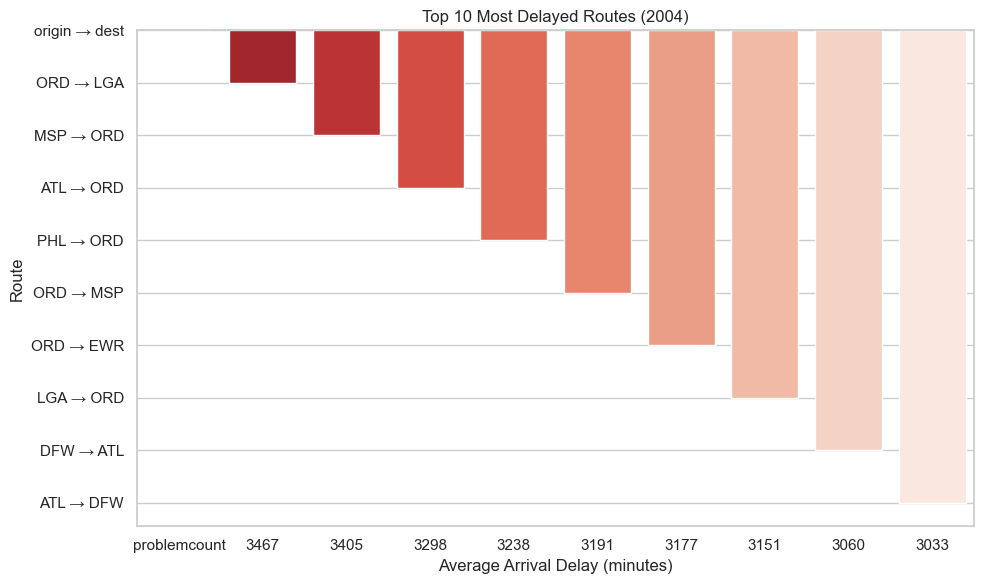

In [12]:
df_route = pd.read_csv("4_1.csv", names=["origin", "dest", "avg_arrdelay"])
df_route["route"] = df_route["origin"] + " → " + df_route["dest"]

top_routes = df_route.sort_values(by="avg_arrdelay", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes, x="avg_arrdelay", y="route", palette="Reds_r")
plt.title("Top 10 Most Delayed Routes (2004)")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8840\1969037548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_carriers, x="avg_arrdelay", y="carrier", palette="Oranges_r")


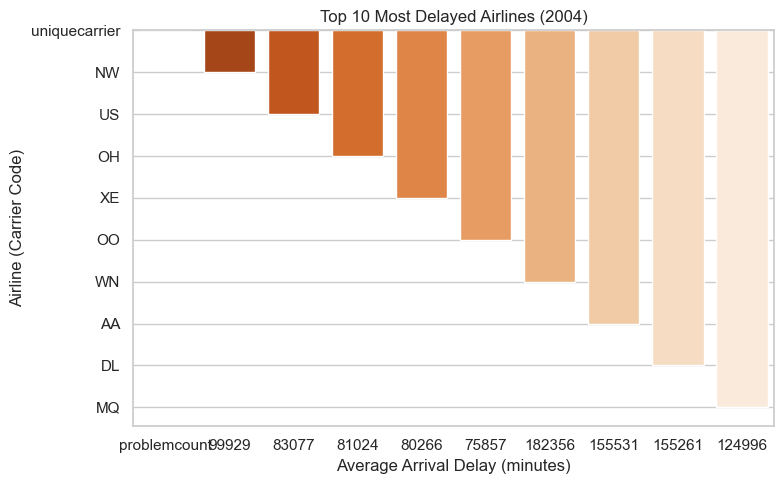

In [13]:
df_carrier = pd.read_csv("4_2.csv", names=["carrier", "avg_arrdelay"])

top_carriers = df_carrier.sort_values(by="avg_arrdelay", ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_carriers, x="avg_arrdelay", y="carrier", palette="Oranges_r")
plt.title("Top 10 Most Delayed Airlines (2004)")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Airline (Carrier Code)")
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8840\4013651194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_flights, x="avg_arrdelay", y="flightnum", palette="Purples_r")


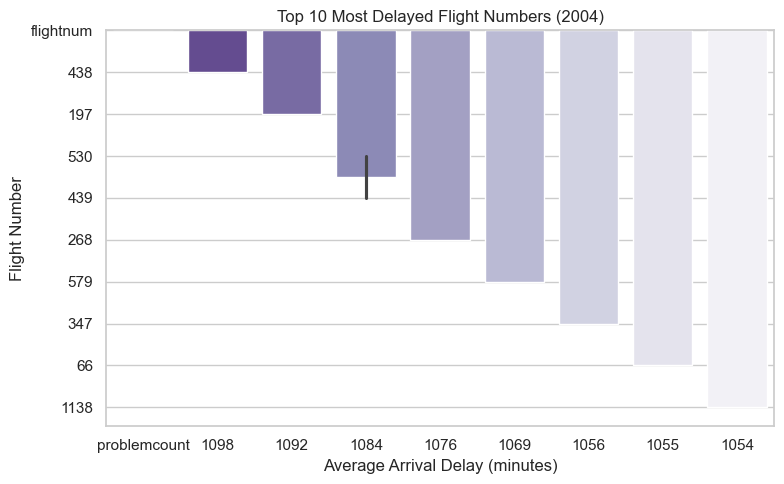

In [14]:
df_flight = pd.read_csv("4_3.csv", names=["flightnum", "avg_arrdelay"])

top_flights = df_flight.sort_values(by="avg_arrdelay", ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_flights, x="avg_arrdelay", y="flightnum", palette="Purples_r")
plt.title("Top 10 Most Delayed Flight Numbers (2004)")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Flight Number")
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8840\3463304208.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="DelayMinutes_Million", y="DelayType", palette="mako")


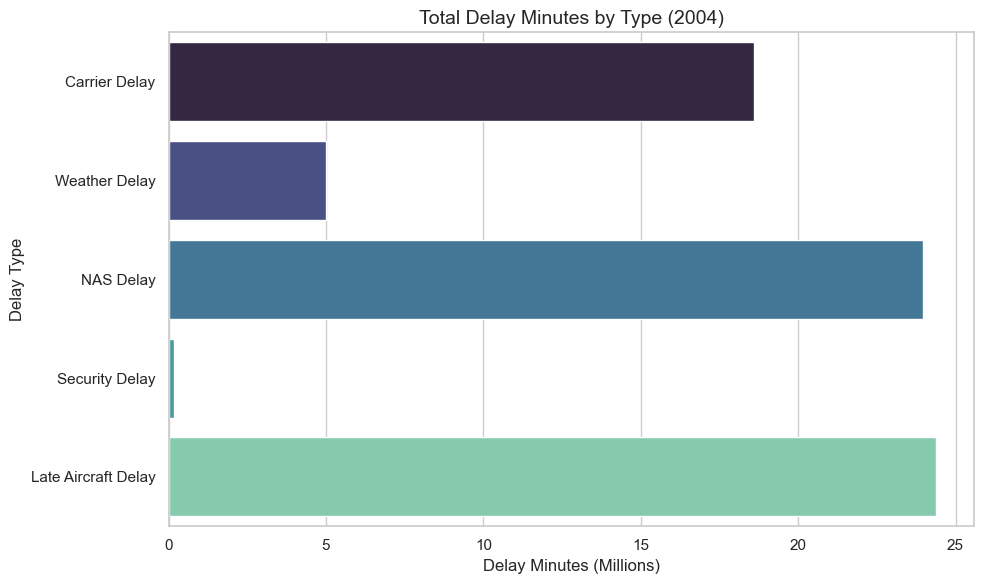

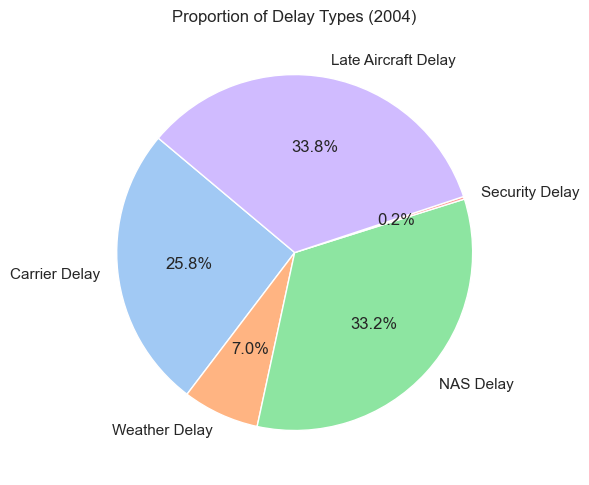

In [15]:
data = {
    "DelayType": [
        "Carrier Delay",
        "Weather Delay",
        "NAS Delay",
        "Security Delay",
        "Late Aircraft Delay"
    ],
    "DelayMinutes": [
        18583109,
        5015911,
        23967635,
        173593,
        24367032
    ]
}

df = pd.DataFrame(data)

df["DelayMinutes_Million"] = df["DelayMinutes"] / 1_000_000

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="DelayMinutes_Million", y="DelayType", palette="mako")
plt.title("Total Delay Minutes by Type (2004)", fontsize=14)
plt.xlabel("Delay Minutes (Millions)")
plt.ylabel("Delay Type")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(df["DelayMinutes"], labels=df["DelayType"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Delay Types (2004)")
plt.tight_layout()
plt.show()

**Analysis**:

In terms of routes, the most frequently delayed routes, such as ‘ATL→ORD’ and ‘ORD→MSP’, both had average delays of more than 3,200 minutes, occupying the top position in terms of long delays. These routes may be affected by busy airports, bad weather or ATC restrictions, resulting in frequent delays.

As for airlines, two airlines, ‘NW’ and ‘US’, accounted for a high proportion of delays. For example, ‘NW’ accounted for about 13.9 per cent of the total delays, while ‘US’ accounted for 10.7 per cent, indicating that their operations are less efficient and they may have maintenance and scheduling problems.

Flight numbers such as ‘438’ and ‘197’ stood out in terms of the number of delays, indicating that they may have recurring technical or operational problems. For example, ‘438’ involved a high proportion of delays in a given time period, suggesting frequent breakdowns or scheduling difficulties for the flight or its aircraft.

The types of delays, such as ‘NAS Delay’ and ‘Late Aircraft Delay’, accounted for about 33.8 per cent and 33.2 per cent, respectively, suggesting that most of the delays were attributable to internal reasons (aircraft scheduling, maintenance, etc.), while the ‘Late Aircraft Delay’ was attributable to internal reasons (aircraft scheduling, maintenance, etc.), This indicates that most of the delays are due to internal reasons (aircraft scheduling, maintenance, etc.), while ‘Weather Delays’ also accounted for a certain percentage (about 7%), emphasising that the weather factor is also an important reason.

In summary, the data clearly shows that the poor performance of certain routes and airlines in terms of delays is mainly due to a combination of factors such as operations management, maintenance and weather. Addressing these key points, improved scheduling processes, enhanced aircraft maintenance and optimised weather response strategies are expected to effectively reduce delays and increase flight punctuality.

##  Recommendations

###  For Travelers:
- Choose morning flights to minimize delays.
- Avoid Friday travel and peak summer months like July and August.
- Pay attention to specific problematic routes or flight numbers when booking.

###  For Airlines:
- Introduce greater buffer time for late-day flights to absorb upstream delays.
- Optimize aircraft rotations to reduce knock-on effects of late aircraft.
- Reevaluate flight schedules on high-delay routes (e.g., JFK–ORD) and redistribute crew/staff accordingly.

###  For Airport & Policy Makers:
- Improve infrastructure and resource allocation at high-traffic or weather-sensitive hubs.
- Invest in delay prediction systems that combine NAS and airline data.
- Enhance coordination during peak seasons and extreme weather events.

---

##  Future Work

For improved insight and deeper predictive capability, we recommend:

- Expanding the analysis across multiple years to identify long-term trends.
- Applying machine learning models (e.g., random forest, logistic regression) to predict flight delays or cancellations.
- Integrating real-time weather APIs to correlate conditions with delay types more precisely.
- Building an interactive dashboard using tools like Plotly Dash or Streamlit for real-time data exploration.

---

##  Final Remarks

Flight delays and cancellations impact millions of travelers and cost the industry billions annually. Through this analysis, we have shown that significant patterns exist and can be leveraged to improve airline operations, passenger satisfaction, and policy design.

Understanding when and why delays occur helps passengers make better travel choices, and gives airlines the insight needed to build more reliable schedules. With further data integration and predictive modeling, these insights could evolve into real-time decision tools to support a more resilient aviation ecosystem.
